In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


# Importando dados / Importing data

In [203]:
df = pd.read_csv('air_system_present_year.csv')
df.head()


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [204]:
df.shape

(16000, 171)

In [205]:
df.dtypes.value_counts()

object    170
int64       1
Name: count, dtype: int64

# Tratando dados / Handling data


### Convertendo 'nas' para NaN / Converting 'nas' to NaN

In [206]:
df.replace("na", np.nan, inplace=True)

In [207]:
# Contando numero de NaNs por culuna / # Counting number of NaNs per column

#print(df.isnull().sum())
pd.set_option('display.max_rows', None)
display(df.isnull().sum().sort_values(ascending=False))



br_000    13129
bq_000    12981
bp_000    12721
bo_000    12376
ab_000    12363
cr_000    12363
bn_000    11713
bm_000    10546
bl_000     7226
bk_000     6094
cf_000     3981
cg_000     3981
ch_000     3981
ad_000     3981
co_000     3981
cv_000     3718
cz_000     3718
cy_000     3718
da_000     3718
cx_000     3718
ct_000     3718
cu_000     3718
dc_000     3718
db_000     3718
ec_00      2644
cm_000     2578
cl_000     2459
ed_000     2459
ca_000     1206
ak_000     1198
dh_000     1094
dm_000     1094
eb_000     1094
dg_000     1094
df_000     1094
di_000     1094
dj_000     1094
dk_000     1094
dl_000     1094
ac_000      926
bx_000      866
cc_000      865
dv_000      764
bd_000      764
dy_000      764
dx_000      764
ar_000      764
ds_000      764
du_000      764
dt_000      764
dr_000      764
dq_000      764
dp_000      764
do_000      764
de_000      764
bc_000      764
bz_000      763
cp_000      763
ef_000      762
ea_000      762
dz_000      762
eg_000      762
af_000  

In [208]:
pd.set_option('display.max_rows', 20)

## Agora, iremos dropar colunas com número de nulos superiores a 6093 /  Now we will drop columns with a number of nulls greater than 6093

In [209]:
# Passo 1: Identificar colunas com mais de 5000 NaNs
cols_to_drop = df.columns[df.isnull().sum() > 6093]

# Passo 2: Dropar as colunas identificadas
df = df.drop(cols_to_drop, axis=1)

print("Colunas removidas:", cols_to_drop)


Colunas removidas: Index(['ab_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000',
       'bq_000', 'br_000', 'cr_000'],
      dtype='object')


In [210]:
#display(df.isnull().sum().sort_values(ascending=False))
df.shape

(16000, 161)

## Eliminando valores nulos / drop null values

In [211]:
df = df.dropna()

In [212]:
df.shape

(11087, 161)

## Covertendo colunas objeto pra valores numericos, menos a de classe /  Covering object columns for numeric values, except the class column

In [213]:
for column in df.select_dtypes(include=['object']).columns:
    if column != 'class':
        df[column] = pd.to_numeric(df[column], errors='coerce')

In [214]:
df.dtypes.value_counts()

int64      154
float64      6
object       1
Name: count, dtype: int64

## Trasformando coluna class para 1 ou 0 / Transforming class column to 1 or 0
* neg = 0
* pos = 1

In [215]:
print(df['class'])

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
15995    neg
15996    neg
15997    neg
15998    neg
15999    neg
Name: class, Length: 11087, dtype: object


In [216]:
print(df['class'].unique())

['neg' 'pos']


In [217]:
# Substituindo neg e pos por 0 e 1. Além disso, convertendo coluna para tipo float
df['class'] = df['class'].str.replace('neg', '0', regex=False)
df['class'] = df['class'].str.replace('pos', '1', regex=False)
df['class'] = df['class'].astype(np.float32, copy=False)

In [218]:
print(df['class'].unique())
print(df['class'])

[0. 1.]
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15995    0.0
15996    0.0
15997    0.0
15998    0.0
15999    0.0
Name: class, Length: 11087, dtype: float32


## Iniciando construção do modelo / Starting model construction

In [219]:
X = df.drop(["class"], axis=1)
y = df['class']

Importando bibliotecas / Importing libraries

In [238]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
#from sklearn.kernel_approximation import RBFSampler
from sklearn.metrics import roc_auc_score, recall_score
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [223]:
#Dropando coluna de posicao 80, por ser toda constante / Dropping column position 80, as it is all constant
X = X.drop(X.columns[80], axis=1)

### Selecionando as 50 features mais importantes para o modelo / Selecting the 50 most important features for the model

In [224]:
# Selecionando 50 features mais relevantes
f_classif = SelectKBest(score_func=f_classif, k=50)
fit = f_classif.fit(X, y)
features = fit.transform(X)

In [225]:
# Exibindo as 50 features
cols = fit.get_support(indices=True)
X.iloc[:,cols]

,aa_000,ag_002,ag_003,ag_004,ah_000,al_000,am_0,an_000,ao_000,ap_000,...,cq_000,cs_002,cs_004,de_000,dg_000,dn_000,ds_000,dt_000,ee_000,ee_005
0,60,0,2682,4736,3976,1520,2374,11516,9480,111258,...,124340,36,920,112,0,340,232,66,7502,654
1,82,0,0,748,5244,0,0,23174,18166,23686,...,46894,114,700,40,0,352,200,62,10040,116
2,66002,0,199486,1358536,1891670,77898,110548,3605894,3291610,959756,...,4644422,162660,217930,692,0,25278,109700,19072,396312,269556
3,59816,0,0,123922,1772828,1116,2372,3546760,3053176,652616,...,4201350,70090,191284,414,0,27740,133542,21290,659550,485332
4,1814,0,0,72,48978,0,0,97146,89920,12932,...,110094,86,1792,36,0,538,1822,344,10216,49782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852,0,0,5486,2276100,0,0,4547950,3779700,973592,...,5522314,357990,522352,1006,0,40386,155596,23350,883900,373918
15996,18,0,0,6444,3740,1150,2790,14656,12242,7222,...,23062,16,2504,66,0,264,106,28,9354,14
15997,79636,0,0,15062,2156280,0,0,4562338,3828492,1238380,...,5802262,37980,233722,456,0,40850,187506,29150,450380,581558
15998,110,0,0,198,12790,0,0,26026,13504,61018,...,87120,84,2008,38,0,602,380,66,22688,544


In [226]:
X = X.iloc[:,cols]

## Removendo outliers / Removing outliers

- Remoção descartada, por reduzir cerca  de 11000 linhas para cerca de 1000(Redução excessiva) / Removal discarded, due to reducing about 11000 lines to about 1000(Excessive reduction)

In [228]:
def remove_outliers_iqr(X):
    # Selecionar apenas colunas numéricas
    numeric_cols = X.select_dtypes(include='number').columns
    
    for col in numeric_cols:
        # Calcular o IQR
        Q1 = X[col].quantile(0.25)
        Q3 = X[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Definir limites para detectar outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filtrar dados dentro dos limites
        X = X[(X[col] >= lower_bound) & (X[col] <= upper_bound)]
    
    return X

In [229]:
'''# Remover outliers
X = remove_outliers_iqr(X)'''

'# Remover outliers\nX = remove_outliers_iqr(X)'

In [230]:
X.shape

(11087, 50)

### Observando balanceamento dos dados / Observing data balance
- Nota-se que os dados estão desbalanceados, tendo uma proporção muito maior de 'neg' do que 'pos' / It is noted that the data is unbalanced, with a much higher proportion of 'neg' than 'pos'

In [231]:
# Contar as ocorrências de cada classe
class_counts = df['class'].value_counts()

# Calcular a porcentagem de cada classe
class_percentages = (class_counts / class_counts.sum()) * 100

# Exibir o resultado
print(class_percentages)

class
0.0    99.431767
1.0     0.568233
Name: count, dtype: float64


Interpretação dos Resultados/ Interpretation of Results
- Falsos Positivos (FP): Caminhões enviados para manutenção sem defeito. Custos de inspeção desnecessários. / False Positives (FP): Trucks sent for maintenance without defect. Unnecessary inspection costs.
- Verdadeiros Positivos (TP): Caminhões enviados para manutenção com defeito. Custos de inspeção e reparo preventivo. / True Positives (TP): Trucks sent for maintenance with defects. Inspection and preventive repair costs.
- Falsos Negativos (FN): Caminhões com defeito não detectados. Custos altos de manutenção corretiva. / False Negatives (FN): Defective trucks not detected. High corrective maintenance costs.
- Custo Total: Soma dos custos de manutenção preventiva e corretiva. / Total Cost: Sum of preventive and corrective maintenance costs.

Métrica de avaliação / evaluation metrics
- Recall Score
- AUC Score

In [232]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
    auc = roc_auc_score(y_teste, previsao)
    recall = recall_score(y_teste, previsao)
    return f'Modelo {nome_modelo}\nAUC {auc}\nRecall {recall}'

### Modelos / Models

- Random Forest Classifier
- SVC
- SGDClassifier

In [233]:
modelo_rf = RandomForestClassifier()
modelo_SGDC = SGDClassifier()
modelo_svc = SVC()

modelos = {'RandomForest': modelo_rf,
           'SGDClass': modelo_SGDC,
           'svc': modelo_svc,
}

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_train, y_train)
    #testar
    previsao =modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo,y_test,previsao))

Modelo RandomForest
AUC 0.7058823529411764
Recall 0.4117647058823529
Modelo SGDClass
AUC 0.5521084658908936
Recall 0.11764705882352941
Modelo svc
AUC 0.5882352941176471
Recall 0.17647058823529413


# Primeiros resultados com 50 colunas mais relevantes / First results with 50 most relevant columns
### Random Forest venceu / Random Forest Won
-    Modelo RandomForest
 -   AUC 0.7058823529411764
-    Recall 0.4117647058823529 <br><br>
-    Modelo SGDClass
-    AUC 0.638347389772606
-    Recall 0.29411764705882354
-    Modelo svc
-    AUC 0.5882352941176471
-    Recall 0.17647058823529413


### Analisando a importância das features na construção do modelo /  Analyzing the importance of features in model construction

,0
ag_002,0.071752
cj_000,0.060211
am_0,0.053875
aq_000,0.050747
al_000,0.046376
...,...
ba_004,0.007302
ce_000,0.007210
ar_000,0.006957
bx_000,0.006942


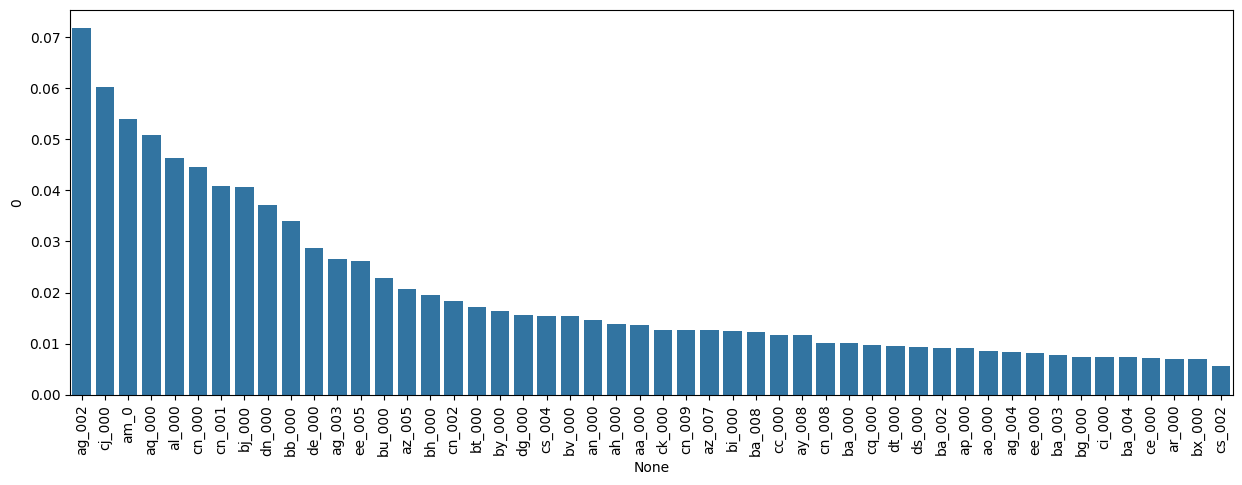

In [235]:
#print (modelo_et.feature_importances_) 
# #print(X_train.columns) 
importancia_features = pd.DataFrame(modelo_rf.feature_importances_, X_train.columns)
importancia_features = importancia_features.sort_values (by=0, ascending=False)
display(importancia_features)
plt.figure(figsize= (15, 5)) 
ax = sns.barplot(x=importancia_features.index, y=importancia_features [0]) 
ax.tick_params(axis='x', rotation=90)


In [236]:
'''X = X.drop('ar_000', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

#treinar
modelo_rf.fit(X_train, y_train)
#testar
previsao =modelo_rf.predict(X_test)
print(avaliar_modelo('RandomForest',y_test,previsao))'''

"X = X.drop('ar_000', axis=1)\ny = df['class']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)\n\n#treinar\nmodelo_rf.fit(X_train, y_train)\n#testar\nprevisao =modelo_rf.predict(X_test)\nprint(avaliar_modelo('RandomForest',y_test,previsao))"

# Testando hiperparâmetros /  Testing hyperparameters

In [239]:
# Vamos aplicar a normalização em treino e teste
# Padronização
sc = MinMaxScaler()
X_treino_normalizados = sc.fit_transform(X_train)
X_teste_normalizados = sc.transform(X_test)

In [243]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, recall_score
import numpy as np
import pandas as pd

# Valores para o grid de hiperparâmetros
n_estimators = np.array([100, 150, 200, 250, 300])
max_depth = np.array([10, 20])
criterion = np.array(["gini", "entropy"])
max_features = np.array(["sqrt", "log2", None])
min_samples_split = np.array([2, 5])
min_samples_leaf = np.array([1, 2, 3])
bootstrap = np.array([True, False])

# Grid de hiperparâmetros
grid_parametros = dict(
    n_estimators=n_estimators,
    max_depth=max_depth,
    criterion=criterion,
    max_features=max_features,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    bootstrap=bootstrap
)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

# Criando o modelo de Random Forest
modelo_rf = RandomForestClassifier()

# Realizando o GridSearchCV
randomForest = GridSearchCV(modelo_rf, grid_parametros, cv=3, n_jobs=-1)
randomForest.fit(X_train, y_train)

# Obtendo os melhores hiperparâmetros
best_params = randomForest.best_params_
print("Melhores Hiperparâmetros:", best_params)

# Treinando um novo modelo de Random Forest com os melhores hiperparâmetros
modelo_rf_melhorado = RandomForestClassifier(**best_params)
modelo_rf_melhorado.fit(X_train, y_train)

# Função para avaliar o modelo
def avaliar_modelo(nome_modelo, y_teste, previsao):
    auc = roc_auc_score(y_teste, previsao)
    recall = recall_score(y_teste, previsao)
    return f'Modelo {nome_modelo}\nAUC {auc}\nRecall {recall}'

# Fazendo previsões com o modelo melhorado
previsao_rf_melhorado = modelo_rf_melhorado.predict(X_test)

# Avaliando o modelo melhorado
print(avaliar_modelo("RandomForest Melhorado", y_test, previsao_rf_melhorado))

# Obtendo e visualizando os resultados do GridSearchCV
treinos_rf = pd.DataFrame(randomForest.cv_results_)
print(treinos_rf)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {randomForest.best_score_ :.2%}")


Melhores Hiperparâmetros: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
Modelo RandomForest Melhorado
AUC 0.7057008647379096
Recall 0.4117647058823529
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         2.048116      0.112449         0.022020        0.005212   
1         3.008280      0.145911         0.029689        0.002128   
2         3.985026      0.149068         0.034979        0.004315   
3         5.229959      0.307048         0.041334        0.000557   
4         7.629178      0.217276         0.091618        0.008227   
..             ...           ...              ...             ...   
715      24.806070      8.565260         0.026046        0.001727   
716      37.616676     12.248410         0.038071        0.004713   
717      49.546180     16.446734         0.044042        0.002886   
718      60.483269     17.882983         0.049207        

# Resultado final / Final result
- Melhores Hiperparâmetros: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250} <br><br>
- Modelo RandomForest Melhorado / Upgrade RandomForest
1. AUC 0.7057008647379096
2. Recall 0.4117647058823529

# Answering questions
1. What steps would you take to solve this problem? Please describe as completely and clearly as possible all the steps that you see as essential for solving the problem.
- Import the data, process it, understand what each column means (which was not possible in this project), choose the target column and the relevant features, choose better metrics, choose better models, improve the model, deploy the model and do its maintenance
2. Which technical data science metric would you use to solve this challenge? Ex: absolute error, rmse, etc.
- AUC (Because it is the best metric for dealing with an unbalanced database) and Recall (Because it is a very effective metric when the objective is to minimize the number of false negatives, as they are what cause the most expenses for the company)
3. Which business metric would you use to solve the challenge?
- Try to reduce at all costs the number of trucks with defects that are not diagnosed
4. How do technical metrics relate to the business metrics?
- Just by analyzing the two previous answers, it is clear that both metrics are related to minimize expenses
5. What types of analyzes would you like to perform on the customer database?
- How many times did he take his vehicle for maintenance, year of purchase, parts changes made and vehicle mileage
6. What techniques would you use to reduce the dimensionality of the problem?
- create a more efficient model to predict in advance whether the truck will have a defect
7. What techniques would you use to select variables for your predictive model?
- Answered in code
8. What predictive models would you use or test for this problem? Please indicate at least 3.
- RF, SVC, SGDClassifier
9. How would you rate which of the trained models is the best?
- Looking at which one has the two best metrics cited
10. How would you explain the result of your model? Is it possible to know which variables are most important?
- It is the model that can classify better, even with an unbalanced base and has fewer false negatives. Is possible, and it was demonstrated with a graph
11. How would you assess the financial impact of the proposed model?
- With adjustments to the model, it will be possible to reduce, with a more acceptable metric, the number of false negatives, resulting in cost savings.
12. What techniques would you use to perform the hyperparameter optimization of the chosen model?
- Use Grid Search to find the best hyperparameters for the chosen model.
13. What risks or precautions would you present to the customer before putting this model into production?
- Obtain more accessible values ​​for metrics, obtaining more security and being careful with model overfitting
14. If your predictive model is approved, how would you put it into production?
- Project Deploy • Step 1 -> Create Model file (joblib) • Step 2 -> Choose the deployment method: • Executable File + Tkinter • Deploy on a Microsite (Flask) • Deploy for direct use only (Streamlit) • Step 3 -> Another Python file (can be Jupyter or PyCharm) • Step 4 -> Import streamlit and create code • Step 5 -> Assign model loading to the button • Step 6 -> Deploy done
15. If the model is in production, how would you monitor it?
- Monitor model performance metrics and input data quality.
16. If the model is in production, how would you know when to retrain it?
- Define criteria for model retraining, such as deterioration of performance metrics.
